<a href="https://colab.research.google.com/github/Gustavolorenzz/IA/blob/main/Gustavolorenzz/IA/tree/main/Codigos/NaiveBayesJogar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB

In [98]:
base = pd.read_csv('https://raw.githubusercontent.com/Gustavolorenzz/IA/main/Bases/jogar.csv')
base

,dia,aparencia,temperatura,umidade,ventando,jogar
0,d1,sol,Quente,Alta,nao,nao
1,d2,sol,Quente,Alta,sim,nao
2,d3,Nublado,Quente,Alta,nao,sim
3,d4,Chuva,Agradavel,Alta,nao,sim
4,d5,Chuva,Fria,Normal,nao,sim
5,d6,Chuva,Fria,Normal,sim,nao
6,d7,Nublado,Fria,Normal,sim,sim
7,d8,sol,Agradavel,Alta,nao,nao
8,d9,sol,Fria,Normal,nao,sim
9,d10,Chuva,Agradavel,Normal,nao,sim


In [99]:
X_jogar = base.iloc[:, 1:5].values
X_jogar

array([['sol', 'Quente', 'Alta', 'nao'],
       ['sol', 'Quente', 'Alta', 'sim'],
       ['Nublado', 'Quente', 'Alta', 'nao'],
       ['Chuva', 'Agradavel', 'Alta', 'nao'],
       ['Chuva', 'Fria', 'Normal', 'nao'],
       ['Chuva', 'Fria', 'Normal', 'sim'],
       ['Nublado', 'Fria', 'Normal', 'sim'],
       ['sol', 'Agradavel', 'Alta', 'nao'],
       ['sol', 'Fria', 'Normal', 'nao'],
       ['Chuva', 'Agradavel', 'Normal', 'nao'],
       ['sol', 'Agradavel', 'Normal', 'sim'],
       ['Nublado', 'Agradavel', 'Alta', 'sim'],
       ['Nublado', 'Quente', 'Normal', 'nao'],
       ['Chuva', 'Agradavel', 'Alta', 'sim']], dtype=object)

In [100]:
Y_jogar = base.iloc[:, 5].values
Y_jogar

array(['nao', 'nao', 'sim', 'sim', 'sim', 'nao', 'sim', 'nao', 'sim',
       'sim', 'sim', 'sim', 'sim', 'nao'], dtype=object)

In [101]:
from sklearn.preprocessing import LabelEncoder
label_encoder_aparencia = LabelEncoder()
label_encoder_temperatura = LabelEncoder()
label_encoder_umidade = LabelEncoder()
label_encoder_ventando = LabelEncoder()

In [102]:
X_jogar[:,0] = label_encoder_aparencia.fit_transform(X_jogar[:, 0])
X_jogar[:,1] = label_encoder_temperatura.fit_transform(X_jogar[:, 1])
X_jogar[:,2] = label_encoder_umidade.fit_transform(X_jogar[:, 2])
X_jogar[:,3] = label_encoder_ventando.fit_transform(X_jogar[:, 3])
X_jogar

array([[2, 2, 0, 0],
       [2, 2, 0, 1],
       [1, 2, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 1],
       [1, 1, 1, 1],
       [2, 0, 0, 0],
       [2, 1, 1, 0],
       [0, 0, 1, 0],
       [2, 0, 1, 1],
       [1, 0, 0, 1],
       [1, 2, 1, 0],
       [0, 0, 0, 1]], dtype=object)

In [103]:
import pickle
with open('jogar.pkl', 'wb') as f:
  pickle.dump([X_jogar, Y_jogar], f)

In [104]:
naive_jogar = GaussianNB()
naive_jogar.fit(X_jogar, Y_jogar)

GaussianNB()

In [105]:
previsao = naive_jogar.predict(X_jogar)
previsao

array(['nao', 'nao', 'nao', 'sim', 'sim', 'sim', 'sim', 'nao', 'sim',
       'sim', 'sim', 'nao', 'sim', 'nao'], dtype='<U3')

In [106]:
Y_jogar

array(['nao', 'nao', 'sim', 'sim', 'sim', 'nao', 'sim', 'nao', 'sim',
       'sim', 'sim', 'sim', 'sim', 'nao'], dtype=object)

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(Y_jogar,previsao)

0.7857142857142857

In [108]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(Y_jogar,previsao)

array([[4, 1],
       [2, 7]])

<Axes: >

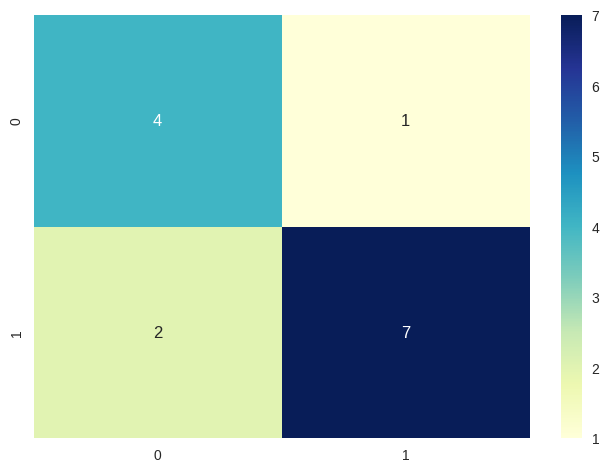

In [109]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_jogar, previsao)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [110]:
from sklearn.metrics import classification_report

print(classification_report(Y_jogar, previsao))

              precision    recall  f1-score   support

         nao       0.67      0.80      0.73         5
         sim       0.88      0.78      0.82         9

    accuracy                           0.79        14
   macro avg       0.77      0.79      0.78        14
weighted avg       0.80      0.79      0.79        14

